# Regression Shrinkage and Selection via the Lasso - Complete Code and Implementation

## By Robert Tibshirani - University of Toronto (1995)

## Analysis and Implementation by Denis L. Cascino

### 1. Statement of Purpose

### 2. Introduction

To really understand the main reasons why Lasso has been introduced in the Statistical and Machine Learning world, it would be beneficial to briefly think about the challenges that OLS poses and the solutions that were already available, their pros and their cons.

We can start out by considering an available dataset of labeled data points, $\{(\textbf{x}_i,y_i)\}_{i=1}^{N}$, where $\textbf{x}_i=(x_1^i \ x_2^i \ ...\ x_p^i)^T $.

At its essence, we are trying to fit a linear model to our available data. The linear model will take the following functional form:

\begin{equation}
y_i = w_0 \ + \ \textbf{w}^T\textbf{x}_i \ + \  \epsilon_i
\end{equation}

$\forall i=1,2,..., N.$

Here, $w_0$ and $\textbf{w}=(w_1 \ w_2 \ ... \ w_p)^T$ are, respectively, the bias and the vector of coefficients that will have to be learned and optimised.

The Ordinary Least Squares (OLS) estimates of the coefficients of the linear regression are obtained by minimising the sum of residual squared errors, formally:

\begin{equation}
\min_{w_0, \textbf{w}} \ \ \  J(w_0, \textbf{w}) = \frac{1}{2}\sum_{i=1}^N(y_i \ - \ w_0  \ - \ \textbf{w}^T\textbf{x}_i)^2
\end{equation}

There are two main issues with this procedure:

- __Prediction Accuracy__: OLS outputs coefficient estimates that find a minimum of the loss function in the training set. This may lead to overfitting of the training data and over-capturing random noise detrimental to the model’s generalisation power. As such, the model will have low bias but high variance to data changes. This will negatively impact the prediction accuracy.

- __Interpretability__: OLS may retain a large number of predictors, even when their forecasting power is minimal. In contrast, we would want a model that selects a small subsets of predictors, mainly those that explain the bulk of the variability of the target variable.

Until Lasso, the two main ways to face these issues were encompassed by two specific models with their corresponding benefits and costs:

1) __Subset Selection__ : this is a discrete process where some coefficients are completely excluded, while others are retained by means of an optimisation problem. As such, the benefits in terms of model interpretability are enormous, however the model variance becomes a relevant issue. The discrete nature of the exclusion process makes the choice of relevant coefficients very sensitive to small changes in the data available.

2) __Ridge Regression__ : this allows for continuous shrinkage of coefficients, thus highly mitigating variance issues relative to subset selection. However, coefficients are not really excluded and are rarely shrinked to zero. This becomes detrimental to model interpretability.

This is the reason why Lasso is proposed. The new operator combines the properties of both subset selection and Ridge Regression, allowing for interpretability and variance mitigation by means of continuous shrinkage of coefficients and zero-setting of some of them.

### 3. The Lasso

### 3.1 Definition

## Shrinkage Comparison

The following provides the plots for coefficient shrinkagings from the different regressions, namely subset selection, ridge, lasso and garotte. The plot comes with a slider that lets the user adjust gamma.

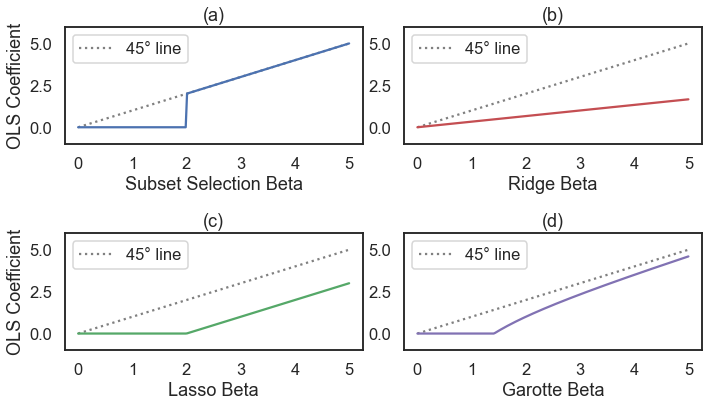

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, FloatSlider

# Set a nice "research-y" style/theme for Seaborn
sns.set_theme(
    style='white',         # pure white background, no grid lines
    context='talk',
    palette='deep'         # Seaborn’s default “deep” palette
)

def plot_four_subplots(beta_value):
    x = np.linspace(1e-6, 5, 200)      # range for plotting
    identity_line = x              # dotted line y = x

    # -- Example relationships to mimic the shapes in your subplots --
    y_a = np.where(x < beta_value, 0, x)
    y_b = (1 / (1 + beta_value)) * x
    y_c = np.maximum(abs(x) - beta_value, 0)
    y_d = np.maximum((1 - (beta_value / (x**2)))*x, 0)

    # Create the figure and axes
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))
    axes = axes.ravel()

    # Subplot (a)
    sns.lineplot(ax=axes[0], x=x, y=identity_line, 
                 color='gray', linestyle=':', label='45° line')
    sns.lineplot(ax=axes[0], x=x, y=y_a, 
                 color='b')
    axes[0].set_title('(a)')
    axes[0].set_xlabel('Subset Selection Beta')
    axes[0].set_ylabel('OLS Coefficient')
    axes[0].set_ylim([-1, 6])
    axes[0].legend()

    # Subplot (b)
    sns.lineplot(ax=axes[1], x=x, y=identity_line, 
                 color='gray', linestyle=':', label='45° line')
    sns.lineplot(ax=axes[1], x=x, y=y_b, 
                 color='r')
    axes[1].set_title('(b)')
    axes[1].set_xlabel('Ridge Beta')
    axes[1].set_ylim([-1, 6])
    axes[1].legend()

    # Subplot (c)
    sns.lineplot(ax=axes[2], x=x, y=identity_line, 
                 color='gray', linestyle=':', label='45° line')
    sns.lineplot(ax=axes[2], x=x, y=y_c, 
                 color='g')
    axes[2].set_title('(c)')
    axes[2].set_xlabel('Lasso Beta')
    axes[2].set_ylabel('OLS Coefficient')
    axes[2].set_ylim([-1, 6])
    axes[2].legend()

    # Subplot (d)
    sns.lineplot(ax=axes[3], x=x, y=identity_line, 
                 color='gray', linestyle=':', label='45° line')
    sns.lineplot(ax=axes[3], x=x, y=y_d, 
                 color='m')
    axes[3].set_title('(d)')
    axes[3].set_xlabel('Garotte Beta')
    axes[3].set_ylim([-1, 6])
    axes[3].legend()

    plt.tight_layout()
    plt.show()

# Create the interactive slider
#interact(
#    plot_four_subplots,
#    beta_value=FloatSlider(
#        value=2.0,  # initial
#        min=0,
#        max=5,
#        continuous_update=True,
#        step=0.1,
#        description='Gamma'
#    )
#)

plot_four_subplots(2.0)